In [12]:
#use this for data generation
import numpy as np
import random
import csv

# Function to generate synthetic data for a given class
def generate_class_data(center_x, center_y, num_points, class_label, spread=1.0):
    data = []
    for _ in range(num_points):
        # Add some randomness around the center
        x = center_x + random.uniform(-spread, spread)
        y = center_y + random.uniform(-spread, spread)
        data.append((x, y, class_label))
    return data

# Generate data for three classes
num_points_per_class = 100
class_1 = generate_class_data(2, 2, num_points_per_class, class_label=0, spread=1.0)
class_2 = generate_class_data(6, 6, num_points_per_class, class_label=1, spread=1.5)
class_3 = generate_class_data(10, 2, num_points_per_class, class_label=2, spread=1.2)

# Combine all class data
synthetic_data = class_1 + class_2 + class_3

# Shuffle the data
random.shuffle(synthetic_data)

# Save the data to a CSV file
csv_file_name = "/content/synthetic_data.csv"
with open(csv_file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(["x", "y", "class_label"])
    # Write data
    writer.writerows(synthetic_data)

print(f"Synthetic data saved to {csv_file_name}")

Synthetic data saved to /content/synthetic_data.csv


Epoch: 0, Error: 0.31265932580113165
Epoch: 10000, Error: 8.652834469131116e-06
Epoch: 20000, Error: 1.6527596645380996e-06
Epoch: 30000, Error: 6.372981414512669e-07
Epoch: 40000, Error: 3.260765400262183e-07
Epoch: 50000, Error: 1.9450670122517805e-07
Epoch: 60000, Error: 1.277629104993456e-07
Epoch: 70000, Error: 8.966160155792943e-08
Epoch: 80000, Error: 6.603130662541659e-08
Epoch: 90000, Error: 5.044674068102451e-08


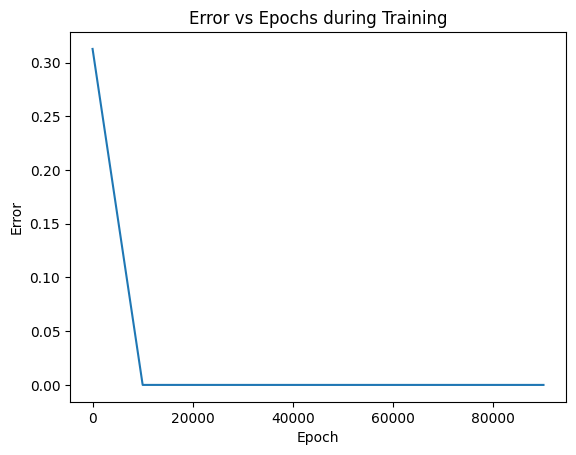

Accuracy: 100.00%


In [13]:
# Neural Network Class
class Neural_Network:
    def __init__(self):
        input_layer_neurons = 2  # x and y
        hidden_layer_neurons_1 = 10
        hidden_layer_neurons_2 = 10
        hidden_layer_neurons_3 = 10
        output_layer_neurons = 3  # 3 classes

        self.learning_rate = 0.02
        self.Weight_Input_Hidden1 = np.random.randn(input_layer_neurons, hidden_layer_neurons_1)
        self.Weight_Hidden1_Hidden2 = np.random.randn(hidden_layer_neurons_1, hidden_layer_neurons_2)
        self.Weight_Hidden2_Hidden3 = np.random.randn(hidden_layer_neurons_2, hidden_layer_neurons_3)
        self.Weight_Hidden3_Output = np.random.randn(hidden_layer_neurons_3, output_layer_neurons)

    def forwardProp(self, input):
        self.hiddenLayer1Input = np.dot(input, self.Weight_Input_Hidden1)
        self.hiddenLayer1Output = self.Sigmoid(self.hiddenLayer1Input)

        self.hiddenLayer2Input = np.dot(self.hiddenLayer1Output, self.Weight_Hidden1_Hidden2)
        self.hiddenLayer2Output = self.Sigmoid(self.hiddenLayer2Input)

        self.hiddenLayer3Input = np.dot(self.hiddenLayer2Output, self.Weight_Hidden2_Hidden3)
        self.hiddenLayer3Output = self.Sigmoid(self.hiddenLayer3Input)

        self.outputLayerInput = np.dot(self.hiddenLayer3Output, self.Weight_Hidden3_Output)
        self.outputLayerOutput = self.Softmax(self.outputLayerInput)

        return self.outputLayerOutput

    def BackProp(self, input, target, pred):
        output_error = target - pred
        output_delta = self.learning_rate * output_error

        hiddenLayer3_error = np.dot(output_delta, self.Weight_Hidden3_Output.T)
        hiddenLayer3_delta = self.learning_rate * hiddenLayer3_error * self.Sigmoid_Deriv(self.hiddenLayer3Output)

        hiddenLayer2_error = np.dot(hiddenLayer3_delta, self.Weight_Hidden2_Hidden3.T)
        hiddenLayer2_delta = self.learning_rate * hiddenLayer2_error * self.Sigmoid_Deriv(self.hiddenLayer2Output)

        hiddenLayer1_error = np.dot(hiddenLayer2_delta, self.Weight_Hidden1_Hidden2.T)
        hiddenLayer1_delta = self.learning_rate * hiddenLayer1_error * self.Sigmoid_Deriv(self.hiddenLayer1Output)

        self.Weight_Input_Hidden1 += np.dot(input.T, hiddenLayer1_delta)
        self.Weight_Hidden1_Hidden2 += np.dot(self.hiddenLayer1Output.T, hiddenLayer2_delta)
        self.Weight_Hidden2_Hidden3 += np.dot(self.hiddenLayer2Output.T, hiddenLayer3_delta)
        self.Weight_Hidden3_Output += np.dot(self.hiddenLayer3Output.T, output_delta)

    def Sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def Sigmoid_Deriv(self, sig):
        return sig * (1 - sig)

    def Softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Prevent overflow
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def ErrMean(self, input, target):
        predictions = self.forwardProp(input)
        return np.mean(np.square(target - predictions))

    def train(self, input, target):
        output = self.forwardProp(input)
        self.BackProp(input, target, output)

# Loading the data from CSV
def load_data(csv_file):
    data = []
    with open(csv_file, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            x, y, class_label = map(float, row)
            data.append((np.array([x, y]), int(class_label)))

    return data

# Preparing data
data = load_data(csv_file_name)
X = np.array([item[0] for item in data])
y = np.array([item[1] for item in data])

# One-hot encode the labels
y_encoded = np.zeros((y.size, 3))  # 3 classes
y_encoded[np.arange(y.size), y] = 1

# Initialize neural network
NN = Neural_Network()

# Training the neural network with error logging
err_list = []
for i in range(100000):
    NN.train(X, y_encoded)  # Train on the whole dataset
    err = NN.ErrMean(X, y_encoded)

    if i % 10000 == 0:
        err_list.append(err)
        print(f'Epoch: {i}, Error: {err}')

# Plotting the error over the epochs
plt.plot(range(0, 100000, 10000), err_list)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error vs Epochs during Training')
plt.show()

# Evaluating the neural network
def evaluate_nn(nn, X, y_encoded):
    correct_predictions = 0
    for i in range(len(X)):
        output = nn.forwardProp(X[i].reshape(1, -1))
        predicted_class = np.argmax(output)
        true_class = np.argmax(y_encoded[i])
        if predicted_class == true_class:
            correct_predictions += 1
    accuracy = correct_predictions / len(X)
    print(f"Accuracy: {accuracy * 100:.2f}%")

evaluate_nn(NN, X, y_encoded)

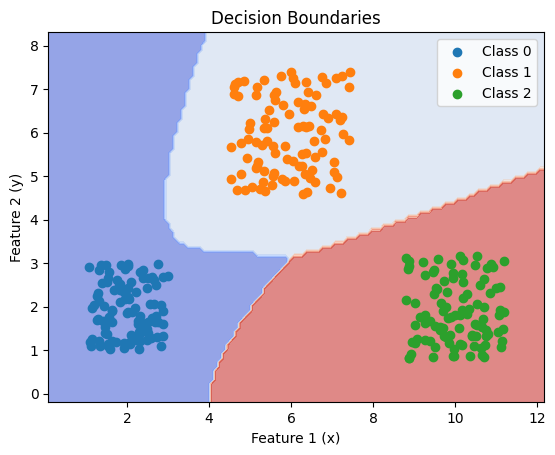

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# Load data from CSV
data = []
with open("/content/synthetic_data.csv", mode="r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header
    for row in reader:
        data.append([float(row[0]), float(row[1]), int(row[2])])

data = np.array(data)
X = data[:, :2]  # Input features (x, y)
Y = data[:, 2].astype(int)  # Output labels (class)

# Create a grid of points to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Combine grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict labels for each grid point
predictions = []
for point in grid_points:
    pred = NN.forwardProp(point.reshape(1, -1))  # Neural network prediction
    predictions.append(np.argmax(pred))  # Class with the highest probability

# Reshape predictions to match the grid
predictions = np.array(predictions).reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, predictions, alpha=0.6, cmap=plt.cm.coolwarm)

# Plot the original data points
for class_value in np.unique(Y):
    plt.scatter(X[Y == class_value, 0], X[Y == class_value, 1], label=f"Class {class_value}")

plt.title("Decision Boundaries")
plt.xlabel("Feature 1 (x)")
plt.ylabel("Feature 2 (y)")
plt.legend()
plt.show()